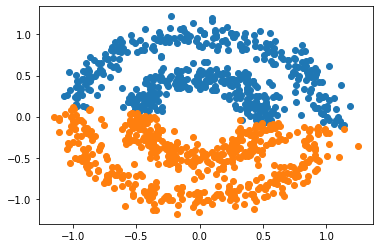

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

np.random.seed(2)
X1,y1=make_circles(n_samples=1000, factor=.5, noise=.09)
model=KMeans(n_clusters=2,random_state=10)
model.fit(X1)
plt.scatter(X1[model.labels_==0,0],X1[model.labels_==0,1])
plt.scatter(X1[model.labels_==1,0],X1[model.labels_==1,1])


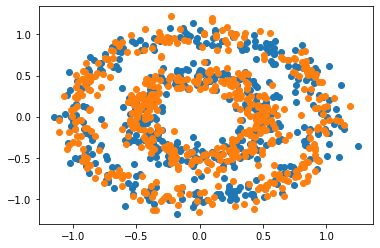

In [2]:
from sklearn.datasets import make_moons
X2,y2=make_moons(n_samples=1000,noise=.1)
model=KMeans(n_clusters=2,random_state=10)
model.fit(X2)
plt.scatter(X1[model.labels_==0,0],X1[model.labels_==0,1])
plt.scatter(X1[model.labels_==1,0],X1[model.labels_==1,1])

DBSCAN(eps=3, min_samples=2)
[ 0  0  0  1  1  2  2 -1]


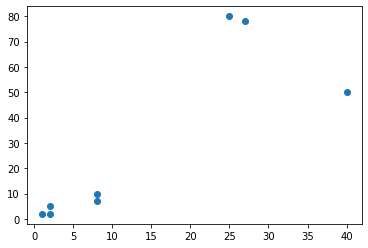

In [3]:
from sklearn.cluster import DBSCAN
import numpy as np
X=np.array([[1,2],[2,2],[2,5],[8,7],[8,10],[25,80],[27,78],[40,50]])
model=DBSCAN(eps=3, min_samples=2).fit(X)
print(model)
plt.scatter(X[:,0],X[:,1])
print(model.labels_)

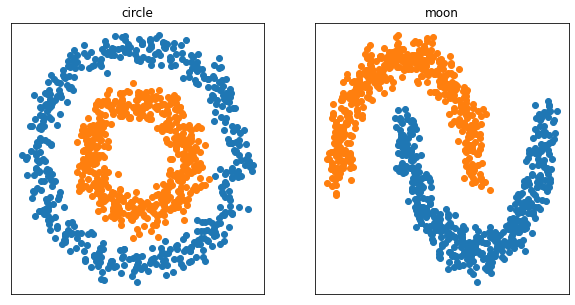

In [4]:
def plot_DBSCAN(title, X, eps):
    model=DBSCAN(eps=eps,min_samples=5)
    model.fit_predict(X)
    plt.scatter(X[model.labels_==0,0],X[model.labels_==0,1])
    plt.scatter(X[model.labels_==1,0],X[model.labels_==1,1])
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

plt.figure(figsize=(10,5))
plt.subplot(121)
plot_DBSCAN("circle", X1,0.1)
plt.subplot(122)
plot_DBSCAN("moon",X2,0.1)

In [2]:
from sklearn import datasets
import pandas as pd

df=pd.read_csv('c:/data/iris/iris2.csv')
df.columns

Index(['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth', 'Name',
       'Species'],
      dtype='object')

In [3]:
cols=['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth']
X=df[cols]
y=df['Species']

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler=StandardScaler()
model=DBSCAN(eps=0.5,min_samples=5)
pipeline=make_pipeline(scaler,model)

pred=pd.DataFrame(pipeline.fit_predict(X))
pred.columns=['predict']
result=pd.concat([X,y,pred],axis=1)
result

,Sepallength,Sepalwidth,Petallength,Petalwidth,Species,predict
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,-1


In [5]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1],
      dtype=int64)

Text(0.5, 1.0, 'clustering')

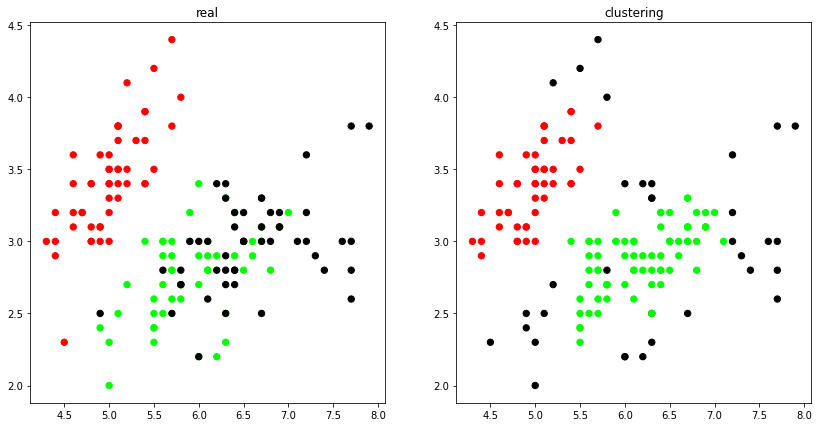

In [7]:
import numpy as np
plt.figure(figsize=(14,7))

colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1)
plt.scatter(result['Sepallength'],result['Sepalwidth'],c=colormap[y],s=40)
plt.title('real')

plt.subplot(1,2,2)
plt.scatter(result['Sepallength'],result['Sepalwidth'],c=colormap[model.labels_],s=40)
plt.title('clustering')


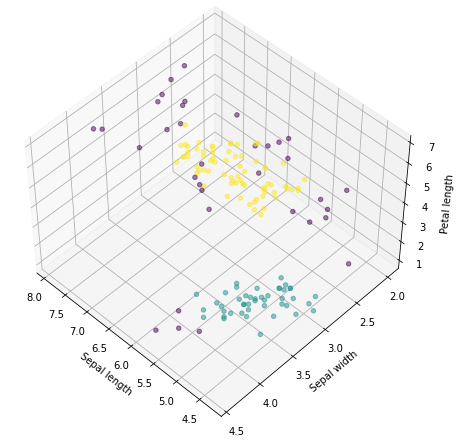

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(6,6))
ax=Axes3D(fig,rect=[0,0,.95,1], elev=48,azim=134)

ax.scatter(result['Sepallength'],result['Sepalwidth'],result['Petallength'],c=result['predict'],alpha=0.5)
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()